In [1]:
import numpy as np
import copy
#from sklearn.datasets import fetch_mldata # This is to import MNIST dataset
import math 
import matplotlib.pyplot as plt

In [2]:
def Layer(Input, Output_Nodes):
    [r,c] = np.shape(Input)
    limit = 1 / math.sqrt(10)
            #self.W  = np.random.uniform(-limit, limit, (self.input_shape[0], self.n_units))
        #self.w0 = np.zeros((1, self.n_units))
        
    Weights = np.random.uniform(-limit,limit,(c, Output_Nodes ))
    Bias = np.zeros((1, Output_Nodes))
    Layer = [Weights,Bias]
    
    return Layer

In [3]:
def add_Layers(Input_Layer, New_Layer_Size):
    Layers_Together = []
    Input_Layer_weight = Input_Layer[0]
    New_Layer = Layer(Input_Layer_weight, New_Layer_Size)
    
    Layers_Together.append(Input_Layer)
    Layers_Together.append(New_Layer)
    
    return Layers_Together

In [4]:
def Leaky_ReLu(x):
    return np.where(x >= 0, x, x*0.2)

def Leaky_ReLu_Prime(x):
    return np.where(x >= 0, 1, 0.2)

In [5]:
def TanH(x):
    return 2 / (1 + np.exp(-2*x)) - 1
def TanH_Prime(x):
    return 1 - np.power(TanH(x), 2)
    

In [6]:
def Sqr_loss(y, y_pred):
    return 0.5 * np.power((y - y_pred), 2)

def Sqr_loss_Prime(y, y_pred):
    return -(y - y_pred)

In [7]:
def Update(w, grad): # Update with Adam Optimizer
    b1=0.9
    b2=0.999
    LR=0.000010
    eps =1e-8
    m=np.zeros(np.shape(grad))
    v=np.zeros(np.shape(grad))
    mm = b1*m + (1 - b1)*grad
    vv = b2*v + (1 - b2)*np.power(grad, 2)
    m_hat = mm / (1 - b1)
    v_hat = vv / (1 - b2)
    w_updt = LR * m_hat / (np.sqrt(v_hat) + eps)
    return w-w_updt
    

In [8]:
def forward(Input,Para_Layer,Activationt_type):
    H = np.dot(Input,Para_Layer[0])+Para_Layer[1]
    
    if Activationt_type==1:
        A = Leaky_ReLu(H)
        Ad = Leaky_ReLu_Prime(H)
    else:
        A = TanH(H)
        Ad = TanH_Prime(H)
        
    
    HL = [A, Ad] # Here Ad is the gradient of activation
    return HL

In [9]:
def backpropa_of_Activated(Gradient,Gradient_activation):
    return Gradient*Gradient_activation

In [10]:
def backpropa_dense(Gradient,Previus_activation_layer, Current_Layer):
    grad_W = Previus_activation_layer.T.dot(Gradient)
    grad_bias = np.sum(Gradient,axis=0, keepdims=True)
    W_Update = Update(Current_Layer[0], grad_W)
    Bias_Update = Update(Current_Layer[1], grad_bias)
    new_Layer = [W_Update,Bias_Update]
    
    New_Gradient = Gradient.dot(W_Update.T)
    return New_Gradient, new_Layer

In [11]:
input = range(1,10)
imgs =np.array(input).reshape(1,9)

In [12]:
L1 = Layer(imgs, 5)
L2 = Layer(L1[0],2)
L3 = Layer(L2[0],5)
L4 = Layer(L3[0],np.shape(imgs)[1])
Layers = [L1,L2,L3,L4]

The Input is [1 2 3 4 5 6 7 8 9]
The Output is [1. 2. 3. 4. 5. 6. 7. 8. 9.]


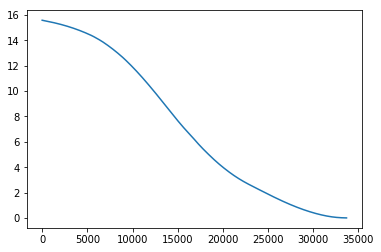

In [13]:
loss = 100
Loss_store = []
#epoch = 1111
while loss>0.001:
#for epo in range(epoch):
    #idx = np.random.randint(0, X.shape[0], 100) # here 10 is the batch size
    #imgs = X[idx]
    i=0
    keep_Latent =[]
    for L in Layers:
        i = i+1
        #print('Opering Layer = ',i)

        if i <=1:
            Latent_Layer = forward(imgs,L,1)

        elif i <=3:
            Latent_Layer = forward(Latent_Layer[0],L,1)
        else:
            Latent_Layer = forward(Latent_Layer[0],L,1)

        keep_Latent.append(Latent_Layer)

    Last_Latent = keep_Latent[-1]
    output = Last_Latent[0]
    loss = np.mean(Sqr_loss(imgs, output)) 
    Loss_store.append(loss)
    #print ("%d [D loss: %f]" % (epoch, loss))

    Gradient = Sqr_loss_Prime(imgs, output)
    gradient_1 = Gradient
    copy_keep_Latent = copy.copy(keep_Latent)
    copy_keep_Latent.reverse()

    g=0
    Updated_Layer = []
    for R in reversed(Layers):
        g=g+1 
        #print(g)
        Current_reversed_latent_Layer = copy_keep_Latent[g-1]
        
        Current_AG = Current_reversed_latent_Layer[1] # current Gradient activation fucntion

        if g<=1:
            Gradient = backpropa_of_Activated(Gradient,Current_AG)
            gradient_2 = Gradient 
            #Gradient=Gradient+copy_gradient
        else:
            Gradient = backpropa_of_Activated(Gradient,Current_AG)
            gradient_3 = Gradient

        Current_Layer=R # Current weight and bias


        if g<=3:
            Previus_Latent_layer = copy_keep_Latent[g]
            Previus_activation_layer = Previus_Latent_layer[0]

            Gradient, new_Layer=backpropa_dense(Gradient,Previus_activation_layer, Current_Layer)
            gradient_4 = Gradient
        else:
            Gradient, new_Layer=backpropa_dense(Gradient,imgs, Current_Layer)
            gradient_5 = Gradient



        Updated_Layer.append(new_Layer)

        new_Weight_and_bias = copy.copy(Updated_Layer)
        new_Weight_and_bias.reverse()

        Layers = new_Weight_and_bias

    #print(loss)
output_array = np.round(Last_Latent[0][0])    
print('The Input is',imgs[0])
print('The Output is',output_array)
plt.plot(Loss_store)
plt.show()
    



In [14]:
loss

0.0009911159359073335